In [1]:
import altair as alt
import pandas as pd
from numpy import random

In [2]:
data = pd.read_csv('video_games.csv')
data = data.dropna().copy(deep = True)

# Preparing the data
# Splitting the genres as there can be multiple genres per game
genre_data = data.assign(Genre=data['Metadata.Genres'].str.split(',')).explode('Genre')

# Counting the number of games per genre
genre_publisher_count = genre_data.groupby(['Genre']).size().reset_index(name='Count')

# Define a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Genre'], empty='none')

# Creating the visualization
chart = alt.Chart(genre_publisher_count).mark_bar().encode(
    x='Count',
    y='Genre',
    color=alt.condition(nearest, 'Genre', alt.value('lightgrey')),
    tooltip=['Genre', alt.Tooltip('Count', title='Games in the Genre')]
).add_selection(
    nearest
).properties(
    width=800,
    height=500
)

chart


/usr/local/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/usr/local/lib/python3.9/site-packages/altair/vegalite/v5/api.py:450: AltairDeprecationWarning: The types 'single' and 'multi' are now
        combined and should be specified using "selection_point()".
  warnings.warn(
/usr/local/lib/python3.9/site-packages/altair/vegalite/v5/api.py:387: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

### Contextual

In [3]:
vg_sales = pd.read_csv('vgsales.csv')
vg_sales = vg_sales.dropna()
vg_sales['Year'] = vg_sales['Year'].astype(int) 
vg_sales = vg_sales[(vg_sales['Year'] >= 2004) & (vg_sales['Year'] <= 2010)]
vg_sales1 = vg_sales[(vg_sales["Global_Sales"] <= 1)]
vg_sales1.shape

(7169, 11)

In [4]:
vg_sample = vg_sales.sample(n= 1769, random_state=8888)
vg_sample["Year"] = vg_sample['Year'].astype(str) + "-01-01"
vg_sample["Year"] = pd.to_datetime(vg_sample["Year"])
vg_sample.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14875,14878,X-Men Origins: Wolverine - Uncaged Edition,PC,2009-01-01,Action,Activision,0.02,0.00,0.00,0.00,0.03
11535,11537,Bleach: Erabareshi Tamashii,PS2,2005-01-01,Adventure,Sony Computer Entertainment,0.00,0.00,0.08,0.00,0.08
7664,7666,Soldier of Fortune: Payback,X360,2007-01-01,Shooter,Activision,0.18,0.01,0.00,0.01,0.20
14294,14297,Custom Beat Battle: Draglade 2,DS,2008-01-01,Fighting,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
10967,10969,SingStar: Made In Germany,PS3,2009-01-01,Misc,Sony Computer Entertainment,0.00,0.07,0.00,0.02,0.09


In [11]:
genre_dropdown = alt.binding_select(options= [None] + list(vg_sample.Genre.unique()), labels = ['All'] + list(vg_sample.Genre.unique()))
genre_select = alt.selection_point(fields=["Genre"], bind=genre_dropdown, name = 'Genre')


context_viz1 = alt.Chart(vg_sample).mark_circle(size=100).encode(
    x = 'Year:T',
    y = 'Global_Sales',
    color= 'Genre',
    tooltip = ['Name', 'Platform', 'Publisher','Global_Sales']
).add_params(genre_select).transform_filter(genre_select).interactive().properties(
    title = 'Global Sales of Video Games Between 2004 and 2010 By Genre',
    width=800,
    height=500
)

context_viz1.save('fp3-1-con1.json')

In [ ]:
seed_arr = [3507, 1006, 9872, 4505, 9801]
cnt = 1
for seed in seed_arr:
    exec(f"vg_sample_{cnt} = vg_sales1.sample(n= 948, random_state=seed)")
    #vg_sample["Year"] = vg_sample['Year'].astype(str) + "-01-01"
    #vg_sample["Year"] = pd.to_datetime(vg_sample["Year"])
    cnt+=1




In [9]:

alt.Chart(vg_sample_1).mark_boxplot(extent="min-max").encode(
    alt.X("Global_Sales:Q").scale(zero=False),
    alt.Y("Year:T"),
    color="Genre:N"
).interactive()

NameError: name 'vg_sample_1' is not defined

/var/folders/1v/s9d18srj05v14v12wdwx7mvm0000gn/T/ipykernel_7656/3955856119.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Publisher', data=top_publishers, palette='viridis')


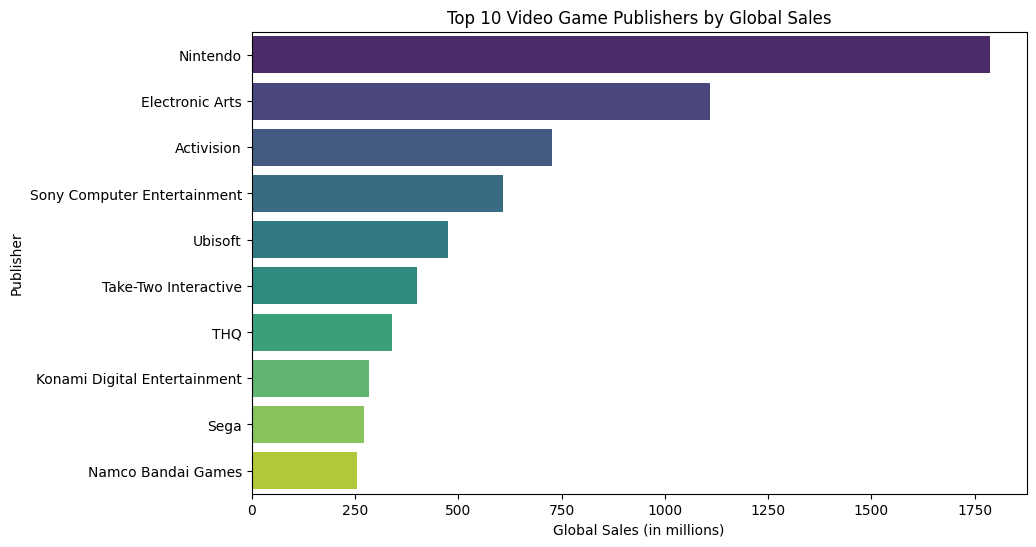

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'vgsales.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Group by Publisher and sum the Global Sales
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Sort by Global Sales and take the top 10
top_publishers = publisher_sales.sort_values(by='Global_Sales', ascending=False).head(10)

# Create a bar chart using Matplotlib and Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Publisher', data=top_publishers, palette='viridis')
plt.title('Top 10 Video Game Publishers by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.show()


In [10]:
import altair as alt
import pandas as pd

# Load the dataset
file_path = 'vgsales.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Group by Publisher and sum the Global Sales
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Sort by Global Sales and take the top 10
top_publishers = publisher_sales.sort_values(by='Global_Sales', ascending=False).head(10)

# Create a bar chart using Altair
chart = alt.Chart(top_publishers).mark_bar().encode(
    x='Global_Sales:Q',
    y=alt.Y('Publisher:N', sort='-x'),
    color='Global_Sales:Q'
).properties(
    width=800,
    height=500,
    title='Top 10 Video Game Publishers by Global Sales'
)

chart.display()
chart.save('fp3-1-con2.json')


alt.Chart(...)